#  1. 데이터 적재

In [1]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [2]:
print("iris_dataset의 키: \n{}".format(iris_dataset.keys()))

iris_dataset의 키: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


?: iris_dataset은 pandas의 형태로 들어가있는 건가?? <br>
A: Bunch라는 클래스로 들어가있다. Dictionary랑 비슷하지만 다르긴 하다. key
, value 쌍으로 저장하는 자료구조

In [3]:
print(iris_dataset['DESCR'][:193] + "\n.....")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
.....


DESCR에는 dataset에 대한 간략한 설명이 들어가있다! :193은 일단 문자열 193까지만 보겠다는 의미!

? [:193]

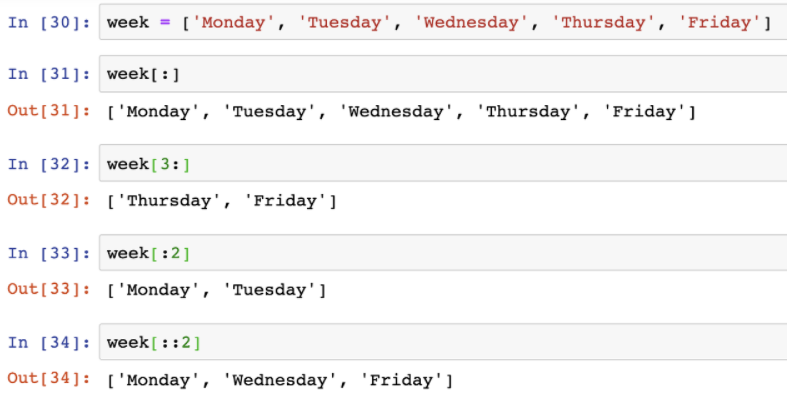


In [4]:
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [5]:
print("특성의 이름: {}".format(iris_dataset['feature_names']))

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("data의 타입: {}".format(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


In [7]:
print("data의 크기: {}".format(iris_dataset['data'].shape))

data의 크기: (150, 4)


In [8]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [12]:
print("taget의 크기: {}".format(iris_dataset['target'].shape))

taget의 크기: (150,)


In [13]:
print("타깃:\n{}".format(iris_dataset['target']))

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 2. 성과 측정 : 훈련 데이터, 테스트 데이터 분리

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

## 궁금증
?? x_train, x_test, y_train, y_test 이게 어떻게 `train_test_split(data, target)` 이렇게 나뉠 수가 있는 것인지?

https://teddylee777.github.io/scikit-learn/train-test-split

overfitting을 막기 위해서 validation으로 또 나누는 것! 
test / train을 나눴는데, train에서 validation을 또 나누는 건가??

In [15]:
print("x_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(Y_train.shape))

x_train 크기 : (112, 4)
y_train 크기 : (112,)


In [17]:
print("X_test 크기: {}".format(X_test.shape))
print("Y_test 크기: {}".format(Y_test.shape))

X_test 크기: (38, 4)
Y_test 크기: (38,)


<br>
? : 38, 4 의 뜻은 38x4 라는 것인가? <br>
? : 38, 의 뜻은 38x1 라는 것인가? <br>
<br>

# 3. 가장 먼저 할 일 : 데이터 살펴보기 (비정상적인 값, 특이한 값 찾기) 

In [20]:
pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=fd8dbe908305f398d80e3715fb302f9cb03bf855145b06354d9dbf70ff7c85c9
  Stored in directory: c:\users\jklh0\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A514990>,
      dtype=object)

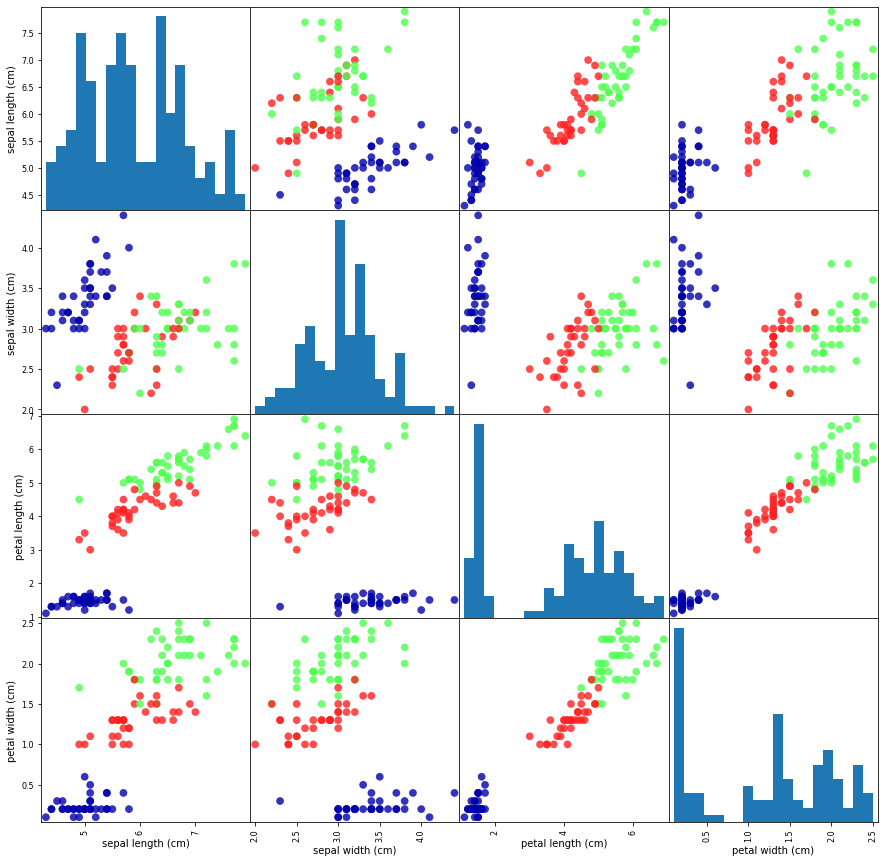

In [21]:
import pandas as pd
import mglearn

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

pd.plotting.scatter_matrix(iris_dataframe, c=Y_train, figsize=(15, 15), marker='o', 
                          hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)


# 4. 첫 번째 머신러닝 모델 : k-최근접 이웃 알고리즘

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# 5. 예측하기

In [25]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [30]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(iris_dataset['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['setosa']


# 6. 모델 평가하기

In [31]:
Y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값: \n {}".format(Y_pred))

테스트 세트에 대한 예측값: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [32]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(Y_pred == Y_test)))

테스트 세트의 정확도: 0.97


In [34]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, Y_test)))

테스트 세트의 정확도: 0.97


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'] ,random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test, Y_test)))

테스트 세트 정확도: 0.97
